<div align="center">
    <b><h2>МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ</h2></b><br/>
    <h4>Національний університет “Львівська політехніка”</h4>
    <h4>Кафедра Систем Штучного Інтелекту</h4>
</div>
<br/>
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Nulp_logo_ukr.jpg/948px-Nulp_logo_ukr.jpg" width="500" alt="nulp logo"  />
</center>
<br/><br/><br/><br/>
<div align="center">
    <h4>Лабораторна робота №4</h4>
    <h4>Варіант №18(3)</h4>
    <h4>Звіт з дисципліни "Машинне навчання"</h4>
    <h4>Тема: "Рекомендаційні системи"</h4>
</div>
<br/><br/><br/>
<br/><br/><br/><br/><br/>
<div align="right">
    <h4><b>Виконав:</b></h4>
    <h4>студент</h4>
    <h4>Орлянський Максим</h4>
    <h4><b>Група:</b></h4>
    <h4>КН-317</h4>
    <h4><b>Прийняв:</b></h4>
    <h4>асистент</h4>
    <h4>Яцишин В. П.</h4>
</div>
<div align="center">
<h5>Львів  2024</h5>
</div>
<br/><br/><br/>
<h5><b>Тема:</b>  Рекомендаційні системи</h5>
<h5><b>Мета: </b> засвоїти основні відомості при роботі з рекомедаційними моделями. Навчитись використовувати його на практиці.</h5>
<br/><br/>
<div align="center">
<h1>Завдання лабораторної роботи
</h1>
</div>
Реалізувати алгоритм рекомендаційну модель для вирішення проблеми згідно варіанту

 0. Ознайомитись з бібліотекою https://surpriselib.com/ 
 1. Згідно варіанту ознайомитись з алгоритмом та датасетом заданим у варіанті
 2. Реалізувати рекомендаційну систему згідно заданого датасету та алгоритму
 3. Провалідувати реалізовану систему(метрики RMSE та MAE). Проаналізувавши 10 випадків коли система найбільше помиляється та 10 випадків коли система виконує коректні передбачення з близькою до 0 похибкою, зробити висновки стосовно того, чого не вистачає побудованій рекомендаційній системі. Пояснення підкріпити прикладами.
 4. Досягнути покращення базових метрик однією з методик які вивчали на курсі.
 5. Для порівняння обрахуйте точність рекомендацій випадкової системи(коли рекомендації випадкові/медіанні/середні)

<b>Алгоритм</b>: SVD++ (cache_rating=True)
<b>Датасет</b>: Movielens 1m
<br/><br/>
<div align="center">
<h1>Розв'язання завдання
</h1>
</div>


# Завантаження та попередня підготовка та аналіз даних

In [62]:
import numpy as np
import pandas as pd
import surprise as sp
import matplotlib.pyplot as plot
from surprise import Reader, Dataset, SVDpp
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [107]:
df = sp.Dataset.load_builtin('ml-1m')
raw_ratings = df.raw_ratings
df = pd.DataFrame(raw_ratings, columns=['user', 'item', 'rating', 'timestamp'])

In [64]:
print(df.head(20))

   user  item  rating  timestamp
0     1  1193     5.0  978300760
1     1   661     3.0  978302109
2     1   914     3.0  978301968
3     1  3408     4.0  978300275
4     1  2355     5.0  978824291
5     1  1197     3.0  978302268
6     1  1287     5.0  978302039
7     1  2804     5.0  978300719
8     1   594     4.0  978302268
9     1   919     4.0  978301368
10    1   595     5.0  978824268
11    1   938     4.0  978301752
12    1  2398     4.0  978302281
13    1  2918     4.0  978302124
14    1  1035     5.0  978301753
15    1  2791     4.0  978302188
16    1  2687     3.0  978824268
17    1  2018     4.0  978301777
18    1  3105     5.0  978301713
19    1  2797     4.0  978302039


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user       1000209 non-null  object 
 1   item       1000209 non-null  object 
 2   rating     1000209 non-null  float64
 3   timestamp  1000209 non-null  object 
dtypes: float64(1), object(3)
memory usage: 30.5+ MB


In [66]:
df.isnull().sum()

user         0
item         0
rating       0
timestamp    0
dtype: int64

In [108]:
le = LabelEncoder()
it_le = LabelEncoder()
df['user'] = le.fit_transform(df['user'])
df['item'] = it_le.fit_transform(df['item'])
df['timestamp'] = df['timestamp'].astype(int)

In [68]:
df.describe()

,user,item,rating,timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,2.973835e+03,1.671966e+03,3.581564e+00,9.722437e+08
std,1.749890e+03,1.092826e+03,1.117102e+00,1.215256e+07
min,0.000000e+00,0.000000e+00,1.000000e+00,9.567039e+08
25%,1.376000e+03,6.740000e+02,3.000000e+00,9.653026e+08
50%,2.986000e+03,1.621000e+03,4.000000e+00,9.730180e+08
75%,4.484000e+03,2.593000e+03,4.000000e+00,9.752209e+08
max,6.039000e+03,3.705000e+03,5.000000e+00,1.046455e+09


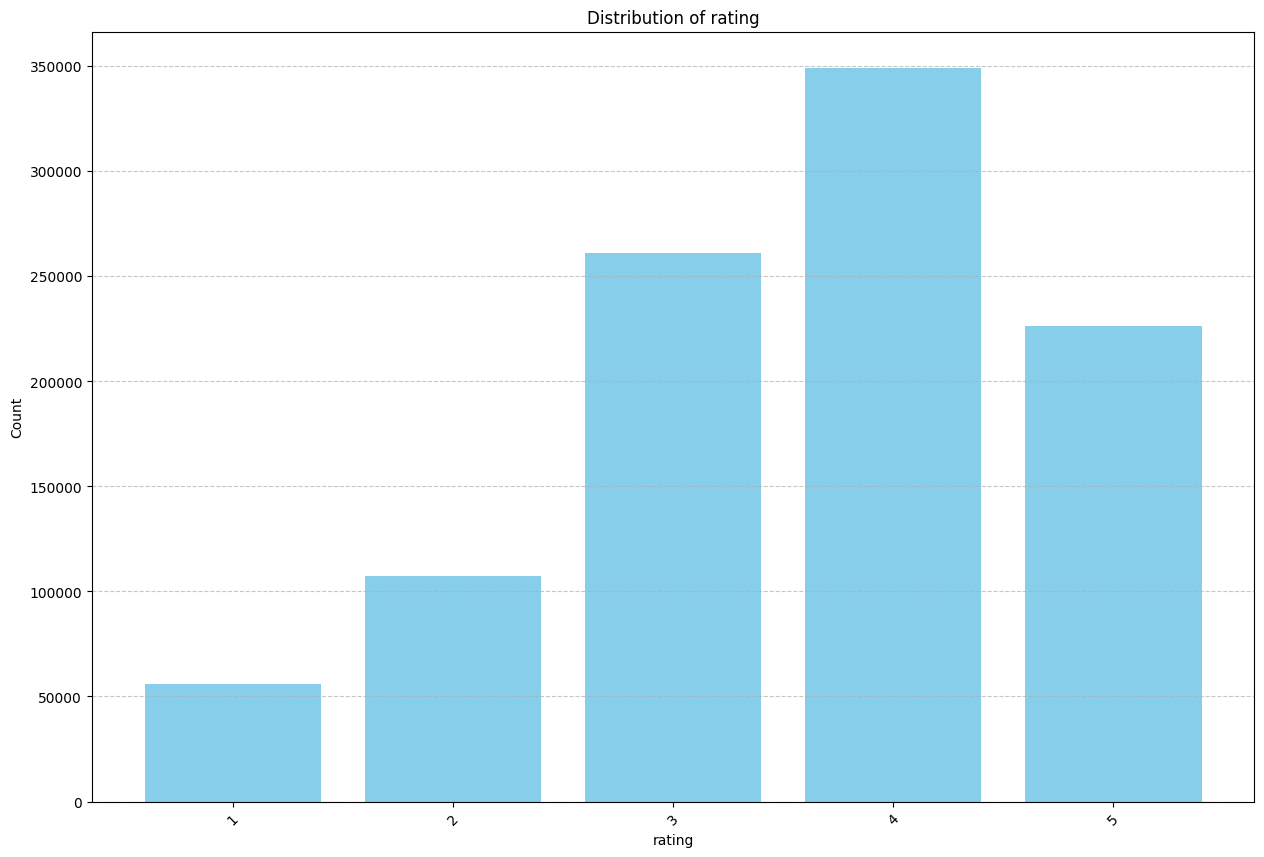

In [109]:
value_counts = df['rating'].value_counts().sort_index()


plot.figure(figsize=(15, 10))
plot.bar(value_counts.index, value_counts.values, color='skyblue')
plot.xlabel('rating')
plot.ylabel('Count')
plot.title('Distribution of rating')
plot.grid(axis='y', linestyle='--', alpha=0.7)
plot.xticks(value_counts.index, rotation=45)
plot.show()

#### із отриманих даних бачимо, що найчастіше користувачі ставлять рейтинг 4

In [70]:
df.nunique()

user           6040
item           3706
rating            5
timestamp    458455
dtype: int64

In [110]:
min_rating = df['rating'].min()
max_rating = df['rating'].max()

In [111]:
reader = Reader(rating_scale=(min_rating, max_rating))

#### Завантажимо колонки User, Item, Rating, та розділимо дані у співвідношенні 7:3 на тестові та навчальні

In [112]:
data = Dataset.load_from_df(df[['user', 'item', 'rating']], reader)

In [113]:
train, test = train_test_split(data, test_size=0.3)

# Створення і навчання моделі SVD++ (із включенням кешування рейтину)

In [114]:
svdpp = SVDpp(cache_ratings=True)
svdpp.fit(train)

#### Проведемо оцінку моделі через крос валідацію по метриках RMSE, MSE, MAE

In [115]:
metrics = cross_validate(svdpp, data, measures=['RMSE', 'MSE','MAE'], cv=4, verbose=True, n_jobs=-1)

Evaluating RMSE, MSE, MAE of algorithm SVDpp on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.8634  0.8639  0.8692  0.8654  0.8655  0.0023  
MSE (testset)     0.7454  0.7464  0.7554  0.7488  0.7490  0.0039  
MAE (testset)     0.6734  0.6734  0.6782  0.6752  0.6750  0.0020  
Fit time          269.86  270.92  271.06  271.93  270.94  0.73    
Test time         86.63   86.11   85.72   84.47   85.73   0.80    


In [116]:
print("Avg MSE:", np.mean(metrics["test_mse"]))
print("Avg RMSE:", np.mean(metrics["test_rmse"]))
print("Avg MAE:", np.mean(metrics["test_mae"]))

Avg MSE: 0.749018056261969
Avg RMSE: 0.8654553575131998
Avg MAE: 0.6750248581993934


In [117]:
predicted_rating = svdpp.test(test)
preds_df = pd.DataFrame(predicted_rating, columns=['user_id', 'item_id', 'actual_rating', 'estimated_rating', 'details'])
preds_df['rating_miss_prediction_error'] = abs(preds_df['actual_rating'] - preds_df['estimated_rating'])

# Дістанемо 20 найгірше передбачених та 20 найкраще передбачених рейтенгів

In [118]:
preds_df.sort_values(by='rating_miss_prediction_error', ascending=False).head(20)

,user_id,item_id,actual_rating,estimated_rating,details,rating_miss_prediction_error
219983,487,2396,1.0,5.000000,{'was_impossible': False},4.000000
203704,757,1692,1.0,5.000000,{'was_impossible': False},4.000000
209777,5516,2158,1.0,5.000000,{'was_impossible': False},4.000000
20296,718,91,1.0,5.000000,{'was_impossible': False},4.000000
267711,2121,258,1.0,5.000000,{'was_impossible': False},4.000000
10907,2752,1340,1.0,5.000000,{'was_impossible': False},4.000000
274683,2752,2229,1.0,5.000000,{'was_impossible': False},4.000000
270379,3027,280,1.0,5.000000,{'was_impossible': False},4.000000
85681,5420,1759,1.0,5.000000,{'was_impossible': False},4.000000
126471,4654,1610,1.0,5.000000,{'was_impossible': False},4.000000


In [119]:
preds_df.sort_values(by='rating_miss_prediction_error', ascending=True).head(20)

,user_id,item_id,actual_rating,estimated_rating,details,rating_miss_prediction_error
234377,2458,201,5.0,5.0,{'was_impossible': False},0.0
283004,3976,3233,5.0,5.0,{'was_impossible': False},0.0
72659,4369,3675,5.0,5.0,{'was_impossible': False},0.0
213697,4572,42,1.0,1.0,{'was_impossible': False},0.0
17878,5320,1640,5.0,5.0,{'was_impossible': False},0.0
249166,2877,3581,1.0,1.0,{'was_impossible': False},0.0
227747,5516,2520,5.0,5.0,{'was_impossible': False},0.0
294129,3581,1015,5.0,5.0,{'was_impossible': False},0.0
258433,3901,3620,5.0,5.0,{'was_impossible': False},0.0
150245,2159,3613,5.0,5.0,{'was_impossible': False},0.0


# Методи покращення SVD++ моделі, шляхом маніпуляції з даними 

### Пошук аномлій у даних через Z-score

C:\Users\maxde\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


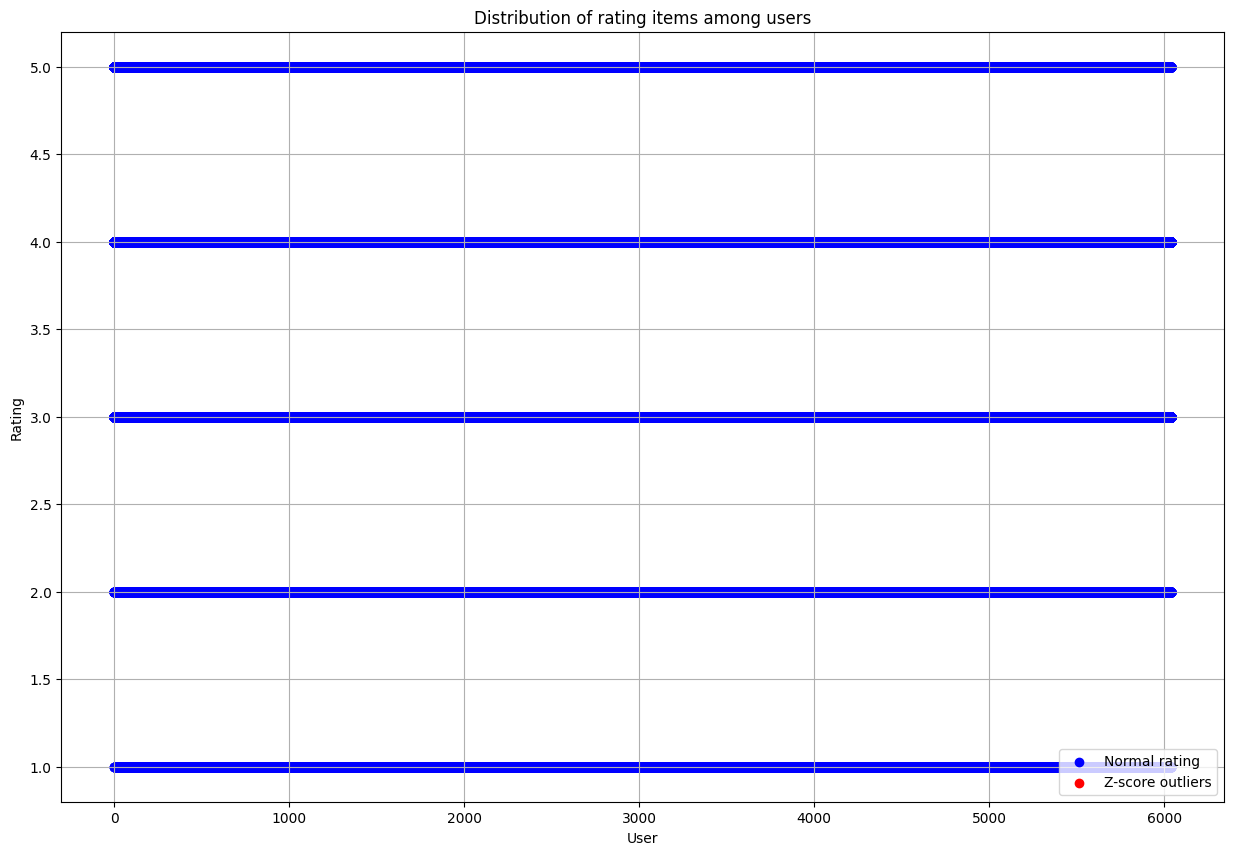

In [120]:
mean_rating = df['rating'].mean()
std_rating = df['rating'].std()
df['z_score'] = (df['rating'] - mean_rating) / std_rating
outliers = df[np.abs(df['z_score']) > 3]

plot.figure(figsize=(15, 10))
plot.scatter(df['user'], df['rating'], color='blue', label='Normal rating')
plot.scatter(outliers['user'], outliers['rating'], color='red', label='Z-score outliers')

plot.xlabel('User')
plot.ylabel('Rating')
plot.title('Distribution of rating items among users')
plot.legend()
plot.grid(True)
plot.show()

In [121]:
outliers

,user,item,rating,timestamp,z_score


#### Як бачимо дані не містять outlier-рів оскільки ні на графіку ні у виводі датафрейму з результатами Z-score жодних аномалій в рейтингу немає

## Нормалізація рейтингу та середнього рейтингу

In [122]:
scaler = MinMaxScaler()
rating_scaled = scaler.fit_transform(df['rating'].values.reshape(-1, 1))
df['rating'] = rating_scaled

In [123]:
df.head(10)

,user,item,rating,timestamp,z_score
0,0,189,1.00,978300760,1.269746
1,0,3374,0.50,978302109,-0.520601
2,0,3615,0.50,978301968,-0.520601
3,0,2503,0.75,978300275,0.374572
4,0,1374,1.00,978824291,1.269746
5,0,192,0.50,978302268,-0.520601
6,0,290,1.00,978302039,1.269746
7,0,1861,1.00,978300719,1.269746
8,0,3307,0.75,978302268,0.374572
9,0,3620,0.75,978301368,0.374572


#### Застосування GreedSearchCV алгоритму, для ввиявлення оптимальних гіперпараметрів моделі SVD++

In [124]:
min_rating = df['rating'].min()
max_rating = df['rating'].max()

In [80]:
temp_reader = Reader(rating_scale=(min_rating, max_rating))
temp_data = Dataset.load_from_df(df[['user', 'item', 'rating']], temp_reader)

param_grid = {
    'n_factors': [10, 30],
    'n_epochs': [10, 20],
    'lr_all': [0.001, 0.01],
    'reg_all': [0.02, 0.1]
}

gs = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)
gs.fit(temp_data)

print("Best RMSE params:", gs.best_params['rmse'])
print("Best RMSE:", gs.best_score['rmse'])

print("Best MAE params:", gs.best_params['mae'])
print("Best MAE:", gs.best_score['mae'])

Best RMSE params: {'n_factors': 10, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.02}
Best RMSE: 0.8603740776679777
Best MAE params: {'n_factors': 10, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.02}
Best MAE: 0.6709462387620732


In [125]:
temp_reader = Reader(rating_scale=(min_rating, max_rating))
temp_data = Dataset.load_from_df(df[['user', 'item', 'rating']], temp_reader)

In [126]:
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(df[['user', 'item', 'rating']], reader)
train, test = train_test_split(temp_data, test_size=0.3)
svdpp = SVDpp(cache_ratings=True, n_factors=10, n_epochs=20, lr_all=0.01, reg_all=0.02)
svdpp.fit(train)

# Аналіз результатів покращенної моделі

In [127]:
metrics = cross_validate(svdpp, data, measures=['MSE', 'RMSE', 'MAE'], cv=4, verbose=True, n_jobs=-1)

Evaluating MSE, RMSE, MAE of algorithm SVDpp on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
MSE (testset)     0.0519  0.0518  0.0518  0.0515  0.0517  0.0002  
RMSE (testset)    0.2278  0.2275  0.2277  0.2268  0.2275  0.0004  
MAE (testset)     0.1802  0.1800  0.1803  0.1795  0.1800  0.0003  
Fit time          126.62  127.17  127.34  125.61  126.69  0.68    
Test time         80.90   80.14   79.93   80.10   80.27   0.37    


In [128]:
print("Avg MSE:", np.mean(metrics["test_mse"]))
print("Avg RMSE:", np.mean(metrics["test_rmse"]))
print("Avg MAE:", np.mean(metrics["test_mae"]))

Avg MSE: 0.051738079649589104
Avg RMSE: 0.2274597485133799
Avg MAE: 0.18000152638803565


In [131]:
predicted_rating2 = svdpp.test(test)
preds_df2 = pd.DataFrame(predicted_rating2, columns=['user_id', 'item_id', 'actual_rating', 'estimated_rating', 'details'])
preds_df2['rating_miss_prediction_error'] = abs(preds_df2['actual_rating'] - preds_df2['estimated_rating'])

In [132]:
preds_df2.sort_values(by='rating_miss_prediction_error', ascending=False).head(20)


,user_id,item_id,actual_rating,estimated_rating,details,rating_miss_prediction_error
8843,1298,2777,1.0,0.000000,{'was_impossible': False},1.000000
281869,4000,3235,0.0,1.000000,{'was_impossible': False},1.000000
68997,3150,2171,0.0,1.000000,{'was_impossible': False},1.000000
61769,3970,193,0.0,1.000000,{'was_impossible': False},1.000000
88079,116,915,1.0,0.000000,{'was_impossible': False},1.000000
199766,1939,1885,1.0,0.000000,{'was_impossible': False},1.000000
276707,4000,107,0.0,1.000000,{'was_impossible': False},1.000000
203171,4000,2453,0.0,1.000000,{'was_impossible': False},1.000000
120173,4000,281,0.0,1.000000,{'was_impossible': False},1.000000
142338,3100,192,0.0,1.000000,{'was_impossible': False},1.000000


In [133]:
preds_df2.sort_values(by='rating_miss_prediction_error', ascending=True).head(20)

,user_id,item_id,actual_rating,estimated_rating,details,rating_miss_prediction_error
156318,3150,363,1.0,1.0,{'was_impossible': False},0.0
68954,4339,223,1.0,1.0,{'was_impossible': False},0.0
127335,701,1551,0.0,0.0,{'was_impossible': False},0.0
29118,423,2264,1.0,1.0,{'was_impossible': False},0.0
187027,3077,3233,1.0,1.0,{'was_impossible': False},0.0
127680,3430,3615,1.0,1.0,{'was_impossible': False},0.0
290249,2552,1916,1.0,1.0,{'was_impossible': False},0.0
9154,5403,2283,1.0,1.0,{'was_impossible': False},0.0
128802,235,212,1.0,1.0,{'was_impossible': False},0.0
68739,1871,3233,1.0,1.0,{'was_impossible': False},0.0


# Обрахунок точності рекомендацій випадкової системи (коли рекомендації випадкові/медіанні/середні)


In [134]:
random = np.full(df['rating'].shape, np.random.uniform(0, 1, size=len(df['rating'])))

median = np.full(preds_df['actual_rating'].shape, preds_df['actual_rating'].median())
mean = np.full(preds_df['actual_rating'].shape, preds_df['actual_rating'].mean())

median2 = np.full(preds_df2['actual_rating'].shape, preds_df2['actual_rating'].median())
mean2 = np.full(preds_df2['actual_rating'].shape, preds_df2['actual_rating'].mean())

In [137]:
random_mse = mean_squared_error(preds_df['actual_rating'], random)
random_rmse = np.sqrt(mean_squared_error(preds_df['actual_rating'], random))
random_mae = mean_absolute_error(preds_df['actual_rating'], random)

random_mse2 = mean_squared_error(preds_df2['actual_rating'], random)
random_rmse2 = np.sqrt(mean_squared_error(preds_df2['actual_rating'], random))
random_mae2 = mean_absolute_error(preds_df2['actual_rating'], random)


median_mse = mean_squared_error(preds_df['actual_rating'], median)
median_rmse = np.sqrt(mean_squared_error(preds_df['actual_rating'], median))
median_mae = mean_absolute_error(preds_df['actual_rating'], median)

median_mse2 = mean_squared_error(preds_df2['actual_rating'], median2)
median_rmse2 = np.sqrt(mean_squared_error(preds_df2['actual_rating'], median2))
median_mae2 = mean_absolute_error(preds_df2['actual_rating'], median2)

mean_mse = mean_squared_error(preds_df['actual_rating'], mean)
mean_rmse = np.sqrt(mean_squared_error(preds_df['actual_rating'], mean))
mean_mae = mean_absolute_error(preds_df['actual_rating'], mean)

mean_mse2 = mean_squared_error(preds_df2['actual_rating'], mean2)
mean_rmse2 = np.sqrt(mean_squared_error(preds_df2['actual_rating'], mean2))
mean_mae2 = mean_absolute_error(preds_df2['actual_rating'], mean2)

In [138]:
print("Pre-modified model:")
print(F"Random: MSE {random_mse}, RMSE {random_rmse}, MAE {random_mae}")
print(F"Median: MSE {median_mse}, RMSE {median_rmse}, MAE {median_mae}")
print(F"Mean: MSE {mean_mse}, RMSE {mean_rmse}, MAE {mean_mae}")
print("Post-modified model:")
print(F"Random: MSE {random_mse2}, RMSE {random_rmse2}, MAE {random_mae2}")
print(F"Median: MSE {median_mse2}, RMSE {median_rmse2}, MAE {median_mae2}")
print(F"Mean: MSE {mean_mse2}, RMSE {mean_rmse2}, MAE {mean_mae2}")

Pre-modified model:
Random: MSE 10.822760068153107, RMSE 3.289796356638676, MAE 3.080135417729961
Median: MSE 1.4258639019139314, RMSE 1.1940954324985635, MAE 0.8718069205466852
Mean: MSE 1.249770192493176, RMSE 1.1179312109844577, MAE 0.93444390483988
Post-modified model:
Random: MSE 0.18157577152463394, RMSE 0.4261170866377385, MAE 0.34818484155050095
Median: MSE 0.08901297394213882, RMSE 0.29835042138756707, MAE 0.2178559169241126
Mean: MSE 0.07800624302951896, RMSE 0.2792959774674869, MAE 0.23354095863155183


#### Бачимо, що нормалізована модель дала кращу точність

# **Висновок**
#### У процесі виконання лабораторної роботи я, реалізував систему рекомендацій на основі алгоритму SVD++, та проаналізував вхідні дані з можливістю покращення точності моделі за рахунок нормалізації та виділення outlier-рів в даних через Z-score та застосування GreedSearchCV для покращення значень гіперпараметрів моделі. Так для початкової моделі SVD++ середне значення метрик RMSE, MSE, MAE склало відповідно MSE=0.749, RMSE=0.865, MAE=0.675. А для покращеної моделі, з кращими гіперпараметрами отриманими через GreedSearchCV, та нормалізованими даними відповідно: MSE= 0.051, RMSE=0.227, MAE=0.18. Відповідно при порівнянні значень моделейн на випадковому значенні, медіані та середньому значенні рейтингу для колонок, нормалізована модель показала кращі результати, що свідчить про те, що нормалізація даних і тюнинг моделі і справді допомогли покращити результати прогнозування рейтингу моделі